In [1]:
import pandas as pd
match_id = '1359475'
df = pd.read_csv('{}_filtered.csv'.format(match_id))

In [2]:
#append match_id as a column
df['match_id'] = match_id

In [3]:
df.head(40)

,inning,over,total_runs,player_dismissed,innings_wickets,innings_score,score_target,remaining_target,run_rate,required_run_rate,runrate_diff,is_batting_team,is_toss_winner,team1,team2,match_id
0,1,1,2,0,0,2,-1,-1,2.000000,-1.000000,-1.000000,1,1,GT,CSK,1359475
1,1,2,11,0,0,13,-1,-1,6.500000,-1.000000,-1.000000,1,1,GT,CSK,1359475
2,1,3,1,1,1,14,-1,-1,4.666667,-1.000000,-1.000000,1,1,GT,CSK,1359475
3,1,4,15,0,1,29,-1,-1,7.250000,-1.000000,-1.000000,1,1,GT,CSK,1359475
4,1,5,17,0,1,46,-1,-1,9.200000,-1.000000,-1.000000,1,1,GT,CSK,1359475
5,1,6,5,1,2,51,-1,-1,8.500000,-1.000000,-1.000000,1,1,GT,CSK,1359475
6,1,7,13,0,2,64,-1,-1,9.142857,-1.000000,-1.000000,1,1,GT,CSK,1359475
7,1,8,8,1,3,72,-1,-1,9.000000,-1.000000,-1.000000,1,1,GT,CSK,1359475
8,1,9,18,0,3,90,-1,-1,10.000000,-1.000000,-1.000000,1,1,GT,CSK,1359475
9,1,10,3,0,3,93,-1,-1,9.300000,-1.000000,-1.000000,1,1,GT,CSK,1359475


In [4]:
import numpy as np
import xgboost as xgb


In [5]:
model = pd.read_pickle('model.pkl')

In [6]:
x_cols = ['inning',
 'over',
 'total_runs',
 'player_dismissed',
 'innings_wickets',
 'innings_score',
 'score_target',
 'remaining_target',
 'run_rate',
 'required_run_rate',
 'runrate_diff',
 'is_batting_team']

In [7]:
val_df = df[x_cols[:]]

In [8]:
# predict the values
val_X = np.array(val_df)#[:-1,:]
xgtest = xgb.DMatrix(val_X)
preds = model.predict(xgtest)

In [9]:
preds

array([0.4649202 , 0.4956399 , 0.3533812 , 0.44496304, 0.50343907,
       0.46757564, 0.5222633 , 0.4938868 , 0.62655693, 0.55360425,
       0.5382559 , 0.62093997, 0.56848437, 0.48341402, 0.49513587,
       0.48190928, 0.5070827 , 0.48031455, 0.47976398, 0.5399818 ,
       0.5433445 , 0.38113046, 0.41701698, 0.53492767, 0.3150333 ,
       0.27332288, 0.3174442 , 0.29272315, 0.28229722, 0.3639711 ,
       0.1790747 , 0.2863681 , 0.33758104, 0.18922542, 0.23228055,
       0.20459624, 0.22840877, 0.4092982 , 0.11776881], dtype=float32)

In [10]:
import matplotlib.pyplot as plt

out_df = pd.DataFrame({'Team1':df.team1.values}) #mumbai indians for colab data
out_df['match_id'] = df.match_id.values
out_df['is_batting_team'] = df.is_batting_team.values
out_df['Team2'] = df.team2.values
#get length of innings 1 in df
innings1_length = len(df[df.inning==1])
innings2_length = len(df[df.inning==2])
out_df['innings_over'] = np.array(df.apply(lambda row: str(row['inning']) + "_" + str(row['over']), axis=1))
out_df['innings_score'] = df.innings_score.values
out_df['innings_wickets'] = df.innings_wickets.values
out_df['score_target'] = val_df.score_target.values
out_df['total_runs'] = df.total_runs.values
out_df['player_dismissed'] = df.player_dismissed.values
out_df['predictions'] = list(preds)
#out_df['run_rate_imp'] = val_df.run_rate_imp.values
out_df['wickets_in_over'] = df.player_dismissed.values
out_df['required_run_rate'] = df.required_run_rate.values
out_df['predicted_team1'] = preds
out_df['predicted_team2'] = 1 - preds

In [11]:
out_df

,Team1,match_id,is_batting_team,Team2,innings_over,innings_score,innings_wickets,score_target,total_runs,player_dismissed,predictions,wickets_in_over,required_run_rate,predicted_team1,predicted_team2
0,GT,1359475,1,CSK,1_1,2,0,-1,2,0,0.464920,0,-1.000000,0.464920,0.535080
1,GT,1359475,1,CSK,1_2,13,0,-1,11,0,0.495640,0,-1.000000,0.495640,0.504360
2,GT,1359475,1,CSK,1_3,14,1,-1,1,1,0.353381,1,-1.000000,0.353381,0.646619
3,GT,1359475,1,CSK,1_4,29,1,-1,15,0,0.444963,0,-1.000000,0.444963,0.555037
4,GT,1359475,1,CSK,1_5,46,1,-1,17,0,0.503439,0,-1.000000,0.503439,0.496561
5,GT,1359475,1,CSK,1_6,51,2,-1,5,1,0.467576,1,-1.000000,0.467576,0.532424
6,GT,1359475,1,CSK,1_7,64,2,-1,13,0,0.522263,0,-1.000000,0.522263,0.477737
7,GT,1359475,1,CSK,1_8,72,3,-1,8,1,0.493887,1,-1.000000,0.493887,0.506113
8,GT,1359475,1,CSK,1_9,90,3,-1,18,0,0.626557,0,-1.000000,0.626557,0.373443
9,GT,1359475,1,CSK,1_10,93,3,-1,3,0,0.553604,0,-1.000000,0.553604,0.446396


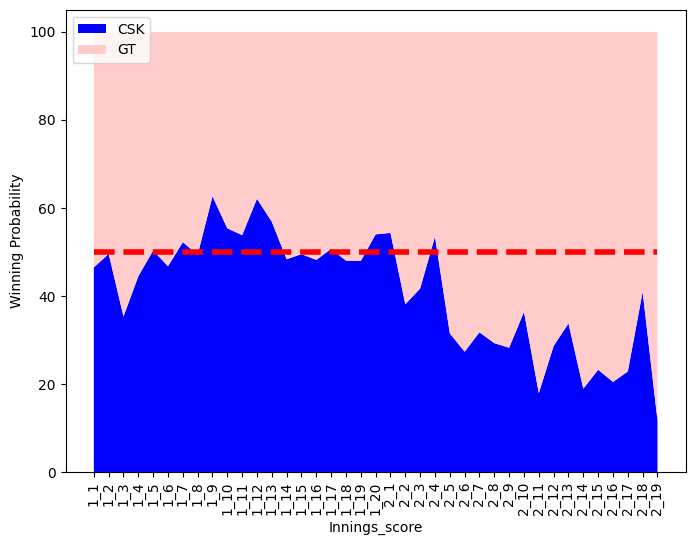

In [12]:
import numpy as np
import matplotlib.pyplot as plt



plt.figure(figsize=[8,6])

team_1 = out_df.Team1.values[0]
team_2 = out_df.Team2.values[0]

# Create data
over= out_df.innings_over.values
Team1=100*out_df.predicted_team1.values
Team2= 100*out_df.predicted_team2.values

#plot a horizontal line at 50% probability with thickness 2
plt.plot([0, len(over)-1], [50, 50], 'r--', linewidth=4,markersize=12)

plt.xticks(rotation=90)
plt.ylabel('Winning Probability')
plt.xlabel('Innings_score')

# Basic stacked area chart.
plt.stackplot(over,Team1, Team2, labels=['{}'.format(team_2),'{}'.format(team_1)],colors=['blue','#FFCCCB'])
plt.legend(loc='upper left')
plt.show()

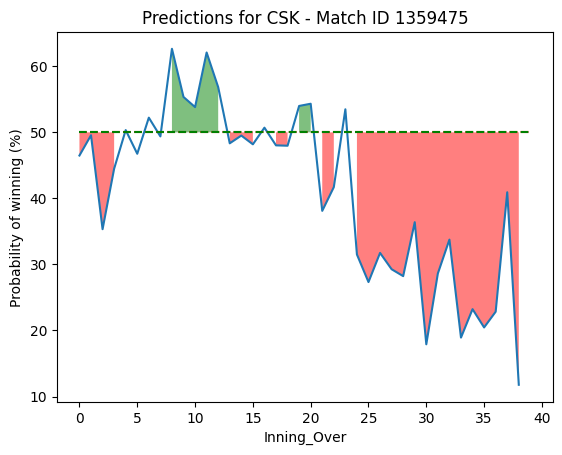

In [13]:
#plot the preds
import matplotlib.pyplot as plt
plt.plot(100*preds)
#make the plot red if value is less than 0.5
plt.plot([0, len(preds)], [50, 50], 'r--')
#make preds lineplot red if value is less than 0.5
plt.fill_between(range(len(preds)), 100*preds, 50, where=100*preds<50, facecolor='red', alpha=0.5)

#make the plot green if value is greater than 0.5
plt.plot([0, len(preds)], [50, 50], 'g--')
#make preds lineplot green if value is greater than 0.5
plt.fill_between(range(len(preds)), 100*preds, 50, where=100*preds>50, facecolor='green', alpha=0.5)

#make the plot more beautiful
plt.title('Predictions for {} - Match ID {}'.format(team_2, match_id))
plt.xlabel('Inning_Over')
plt.ylabel('Probability of winning (%)')

#make the background more beautiful




plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Predictions for GT vs CSK with run rate in each innings')

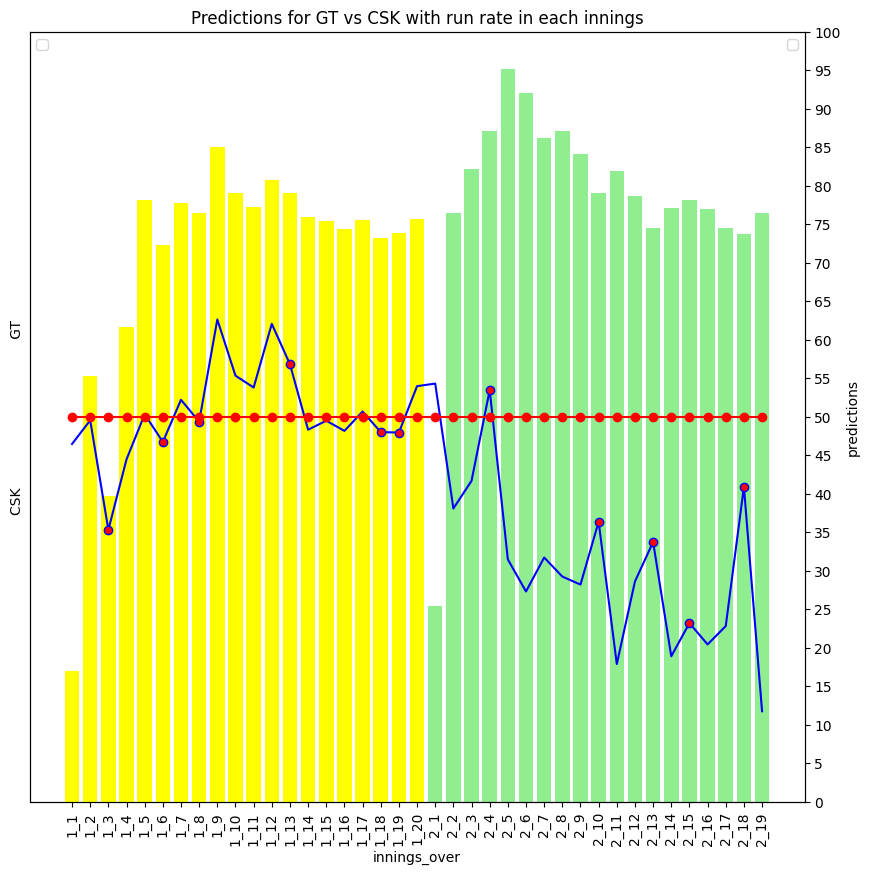

In [14]:
fig, ax1 = plt.subplots()
# set the figure size
fig.set_size_inches(10, 10)
ax1.set_xlabel('innings_over')
ax1.set_ylabel('run_rate')
ax1.bar(out_df['innings_over'], df['run_rate'], color=['yellow']*innings1_length + ['#90ee90']*innings2_length)
ax1.legend(loc=2)
# make the x axis labels vertical
plt.xticks(rotation=90)
ax2 = ax1.twinx()
ax2.set_ylabel('predictions')
wicket_indices = [i for i, x in enumerate(out_df['player_dismissed']) if x >= 1]
ax2.plot(out_df['innings_over'], np.array(out_df['predicted_team1'])*100, color='blue',marker='o',markevery=wicket_indices,markerfacecolor='red' )


#change the size of ma

#set axis1 ylabel first half as team1 and second half as team2
ax1.set_yticks(np.arange(0, 10, 1))

label = '{}                                  {}'.format(team_2,team_1)

ax1.set_ylabel(label)

#make ax2 y ticks from 100 to 50 in 1st half and 50 to 100 in 2nd half


# remove yticks for ax1
ax1.set_yticks([])




#make a horizonal line for pred at 0.5
ax2.plot(out_df['innings_over'],np.array([50]*len(out_df['predicted_team1'])),color='red', marker='o')
ax2.set_yticks(np.arange(0, 105, 5))
ax2.legend(loc=1)

plt.title('Predictions for {} vs {} with run rate in each innings'.format(team_1,team_2))
#plt.show()

In [15]:
out_df.to_csv('{}_results.csv'.format(match_id))